# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Use the JSON module to load and parse JSON documents
* Load and explore unknown JSON schemas
* Convert JSON to a pandas dataframe

## Loading the JSON file

Load the data from the file `disease_data.json`.

In [1]:
#Your code here
import json
import pandas as pd

f = open('disease_data.json')
data = json.load(f)

## Explore the first and second levels of the schema hierarchy

In [114]:
#Your code here

display('top level:', data.keys())
display('meta', data['meta'].keys(), 'data', len(data['data']))

'top level:'

dict_keys(['meta', 'data'])

'meta'

dict_keys(['view'])

'data'

60266

## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [115]:
#Your code here
df = pd.DataFrame(data['data'])

In [116]:
len(data['meta']['view']['columns'])

42

In [117]:
df.columns = [x['name'] for x in data['meta']['view']['columns']]

## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [118]:
asthma = df[df.Question=='Current asthma prevalence among adults aged >= 18 years']
overall = asthma[asthma.StratificationCategoryID1=='OVERALL']
overall
cols = ['LocationAbbr', 'LocationDesc', 'DataSource','Topic', 'Question', 'YearStart', 'YearEnd', 'DataValue', 'DataValueTypeID']
view = overall[cols]
view = view.sort_values('LocationAbbr')
view = view[view['DataValueTypeID']=='CRDPREV']
view

,LocationAbbr,LocationDesc,DataSource,Topic,Question,YearStart,YearEnd,DataValue,DataValueTypeID
9372,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,8.8,CRDPREV
9371,AL,Alabama,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,9.7,CRDPREV
9374,AR,Arkansas,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,8.5,CRDPREV
9373,AZ,Arizona,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,9.4,CRDPREV
9375,CA,California,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,7.8,CRDPREV
9376,CO,Colorado,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,8.8,CRDPREV
9377,CT,Connecticut,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,10.5,CRDPREV
9379,DC,District of Columbia,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,9.8,CRDPREV
9378,DE,Delaware,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,8.5,CRDPREV
9380,FL,Florida,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,6.7,CRDPREV


In [119]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Location')

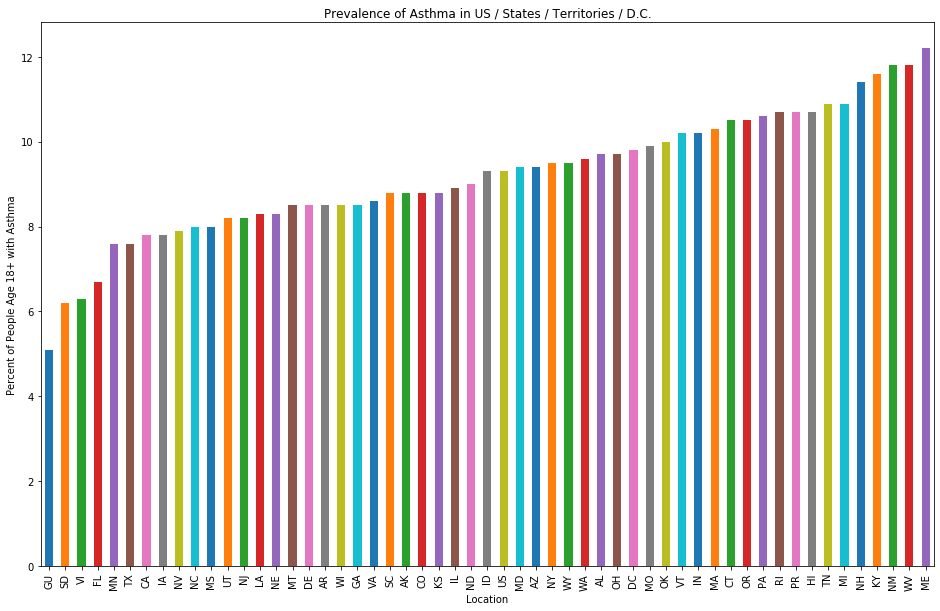

In [120]:
to_plot = view.set_index('LocationAbbr')
to_plot['DataValue'] = to_plot['DataValue'].map(lambda x: float(x))
to_plot['DataValue'].sort_values()\
    .plot(kind='bar', figsize=(16,10), color=['C'+str(x) for x in range(10)])
plt.title('Prevalence of Asthma in US / States / Territories / D.C.')
plt.ylabel('Percent of People Age 18+ with Asthma')
plt.xlabel('Location')

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files, converting json files to pandas DataFrame, and visualizing data!